In [166]:
from pydataset import data
from env import get_connection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import acquire as ac
import seaborn as sns
import scipy.stats as stats

# Data Acquisition Exercises

1. Make a new repo called classification-exercises on both GitHub and within your codeup-data-science directory. This will be where you do your work for this module.

In [2]:
# Done

2. Inside of your local classification-exercises repo, create a file named .gitignore with the following contents:
* env.py
* .DS_Store
* .ipynb_checkpoints/
* __pycache__
* *.csv

Add and commit your .gitignore file before moving forward.

In [3]:
# Done

3. Now that you are 100% sure that your .gitignore file lists env.py, create or copy your env.py file inside of classification-exercises. Running git status should show that git is ignoring this file.

In [4]:
# Being git ignored :)

4. In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

* print the first 3 rows
* print the number of rows and columns (shape)
* print the column names
* print the data type of each column
* print the summary statistics for each of the numeric variables

In [5]:
df_iris = data('iris')
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [6]:
df_iris.shape

(150, 5)

In [7]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [8]:
df_iris.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [9]:
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


5. Read the data from this google sheet into a dataframe, df_google.

* print the first 3 rows
* print the number of rows and columns
* print the column names
* print the data type of each column
* print the summary statistics for each of the numeric variables
* print the unique values for each of your categorical variables

In [10]:
google_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
export_url = google_url.replace('/edit#gid=341089357', '/export?format=csv')
df_google = pd.read_csv(export_url)
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
df_google.shape

(891, 12)

In [12]:
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
df_google.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
cats = df_google.select_dtypes(exclude=['int', 'float'])

#for col in cats.columns:
#    print(cats[col].nunique())

cats.nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

6. Download the previous exercise's file into an excel (File → Download → Microsoft Excel). Read the downloaded file into a dataframe named df_excel.

* assign the first 100 rows to a new dataframe, df_excel_sample
* print the number of rows of your original dataframe
* print the first 5 column names
* print the column names that have a data type of object
* compute the range for each of the numeric variables.

In [16]:
df_excel = pd.read_excel('train.xlsx')
df_excel.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [17]:
df_excel_sample = df_excel.head(100)
df_excel_sample.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [18]:
df_excel_sample.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

In [19]:
df_excel_sample.select_dtypes(object).columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [20]:
stats = df_excel.describe()
stats

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
maxes = stats.iloc[-1]

In [22]:
mins = stats.iloc[3]

In [23]:
maxes - mins

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

In [24]:
ac.get_titanic_data().head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [25]:
ac.get_iris_data().head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [26]:
ac.get_telco_data().head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [27]:
ac.show_tables('chipotle')

,Tables_in_chipotle
0,orders


In [28]:
ac.sql_query('chipotle','SELECT * FROM orders')

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


# Data Preparation Exercises

In [29]:
import prepare as prep

## Using the Iris Data:

1. Use the function defined in acquire.py to load the iris data.

In [30]:
iris = ac.get_iris_data()
iris.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


2. Drop the species_id and measurement_id columns.

In [31]:
iris = iris.drop(columns = ['species_id','measurement_id'])
iris.head()

,species_name,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


3. Rename the species_name column to just species.

In [32]:
new_names = {'species_name':'species'}
iris = iris.rename(columns=new_names)
iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


4. Create dummy variables of the species name and concatenate onto the iris dataframe. (This is for practice, we don't always have to encode the target, but if we used species as a feature, we would need to encode it).

In [33]:
# Skip dummy or you are a dummy!!!

5. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [34]:
#def prep_iris(df):
#    new_df = df.drop(columns = ['species_id','measurement_id'])
#    new_df = new_df.rename(columns={'species_name':'species'})
#    return new_df

In [35]:
iris = ac.get_iris_data()
prep.prep_iris(iris).head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


## Using the Titanic dataset

1. Use the function defined in acquire.py to load the Titanic data.

In [36]:
titanic = ac.get_titanic_data()
titanic.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


2. Drop any unnecessary, unhelpful, or duplicated columns.

In [37]:
titanic = titanic.drop(columns = ['passenger_id','pclass','embarked'])
titanic.head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,0
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,0
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,1
3,1,female,35.0,1,0,53.1000,First,C,Southampton,0
4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,1


3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [38]:
# Skip dummy or you are a dummy!!!

4. Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [39]:
#def prep_titanic(df):
#    titanic = df.drop(columns = ['passenger_id','pclass','embarked'])
#    return titanic

In [40]:
titanic = ac.get_titanic_data()
prep.prep_titanic(titanic).head()

,survived,sex,age,sibsp,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,NaN,Southampton,0
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,0
2,1,female,26.0,0,0,7.9250,Third,NaN,Southampton,1
3,1,female,35.0,1,0,53.1000,First,C,Southampton,0
4,0,male,35.0,0,0,8.0500,Third,NaN,Southampton,1


## Using the Telco dataset

1. Use the function defined in acquire.py to load the Telco data.

In [41]:
telco = ac.get_telco_data()
telco.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


2. Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [42]:
telco = telco.drop(columns = ['payment_type_id','internet_service_type_id','contract_type_id'])
telco.head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


3. Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [43]:
# Skip dummy or you are a dummy!!!

4. Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [44]:
#def prep_telco(df):
#    telco = df.drop(columns = ['payment_type_id','internet_service_type_id','contract_type_id'])
#    return telco

In [45]:
telco = ac.get_telco_data()
prep.prep_telco(telco).head(3)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,No,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,No,No,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,No,No,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


### Split your data

1. Write a function to split your data into train, test and validate datasets. Add this function to prepare.py.

In [46]:
#import prepare as prep
#def train_val_test(df, strat, seed=100):
#    train, val_test = train_test_split(df, train_size=0.7, random_state=seed, stratify=df[strat])
#    val, test = train_test_split(val_test, train_size=0.5, random_state=seed, stratify=val_test[strat])
#    return train, val, test

# Added to prepare.py

2. Run the function in your notebook on the Iris dataset, returning 3 datasets, train_iris, validate_iris and test_iris.

In [47]:
iris = ac.get_iris_data()
iris = prep.prep_iris(iris)

train_iris, validate_iris, test_iris = prep.train_val_test(iris, 'species')

In [48]:
train_iris.shape

(105, 5)

In [49]:
validate_iris.shape

(22, 5)

In [50]:
test_iris.shape

(23, 5)

3. Run the function on the Titanic dataset, returning 3 datasets, train_titanic, validate_titanic and test_titanic.

In [51]:
titanic = ac.get_titanic_data()
titanic = prep.prep_titanic(titanic)

train_titanic, validate_titanic, test_titanic = prep.train_val_test(titanic, 'survived')

In [52]:
train_titanic.shape

(623, 10)

In [53]:
validate_titanic.shape

(134, 10)

In [54]:
test_titanic.shape

(134, 10)

4. Run the function on the Telco dataset, returning 3 datasets, train_telco, validate_telco and test_telco.

In [55]:
telco = ac.get_telco_data()
telco = prep.prep_telco(telco)

train_telco, validate_telco, test_telco = prep.train_val_test(telco, 'churn')

In [56]:
train_telco.shape, validate_telco.shape, test_telco.shape

((4930, 21), (1056, 21), (1057, 21))

# Exploratory Analysis Exercises

## Part I

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. Acquire, prepare & split your data.

In [59]:
iris = ac.get_iris_data()
iris = prep.prep_iris(iris)

t_iris, val_iris, test_iris = prep.train_val_test(iris, 'species')

for i in [t_iris, val_iris, test_iris]:
    print(i.shape)

(105, 5)
(22, 5)
(23, 5)


In [60]:
t_iris.head()

,species,sepal_length,sepal_width,petal_length,petal_width
71,versicolor,6.1,2.8,4.0,1.3
90,versicolor,5.5,2.6,4.4,1.2
4,setosa,5.0,3.6,1.4,0.2
17,setosa,5.1,3.5,1.4,0.3
18,setosa,5.7,3.8,1.7,0.3


2. Univariate Stats

* For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

* For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

* Document takeaways & any actions.

In [196]:
t_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,105.000000,105.000000,105.000000,105.000000
mean,5.864762,3.075238,3.769524,1.214286
std,0.830081,0.411559,1.788969,0.771291
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.500000,0.300000
50%,5.800000,3.000000,4.400000,1.400000
75%,6.400000,3.400000,5.100000,1.800000
max,7.900000,4.200000,6.900000,2.500000


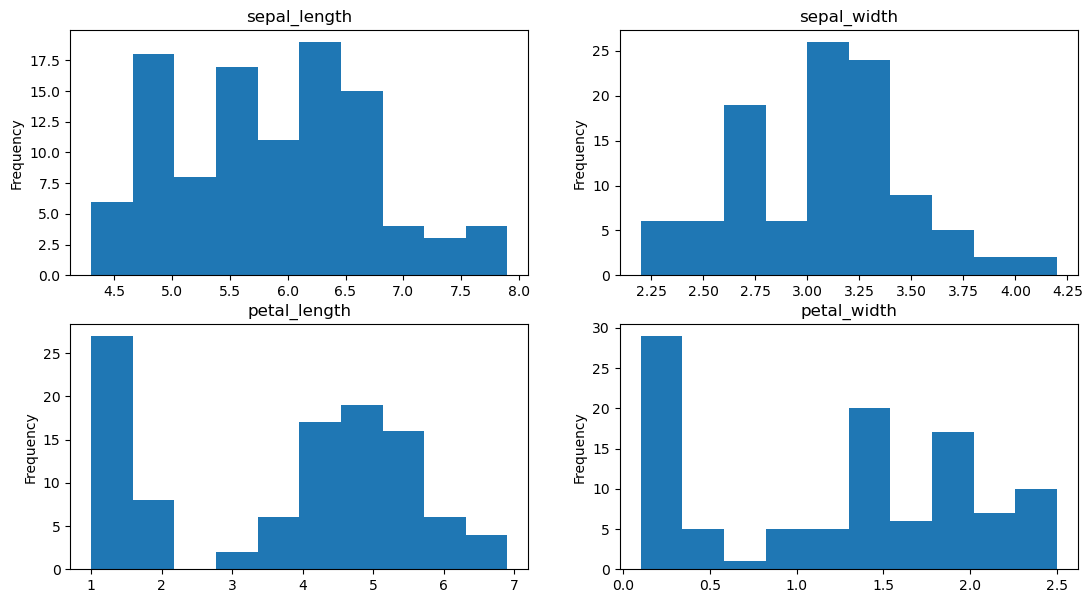

In [113]:
f, axs = plt.subplots(2,2)

f.set_figheight(7)
f.set_figwidth(13)

axs[0,0].hist(t_iris.sepal_length)
axs[0,0].set_title('sepal_length')

axs[0,1].hist(t_iris.sepal_width)
axs[0,1].set_title('sepal_width')

axs[1,0].hist(t_iris.petal_length)
axs[1,0].set_title('petal_length')

axs[1,1].hist(t_iris.petal_width)
axs[1,1].set_title('petal_width')

for ax in axs.flat:
    ax.set(ylabel='Frequency')

plt.show()

<Axes: ylabel='Count'>

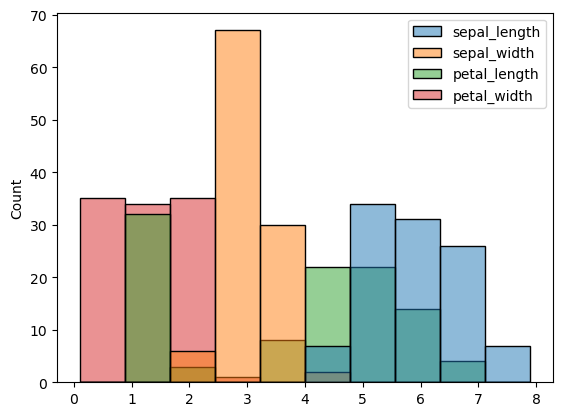

In [197]:
sns.histplot(data=t_iris[list(t_iris.select_dtypes(float).columns)])

<Axes: >

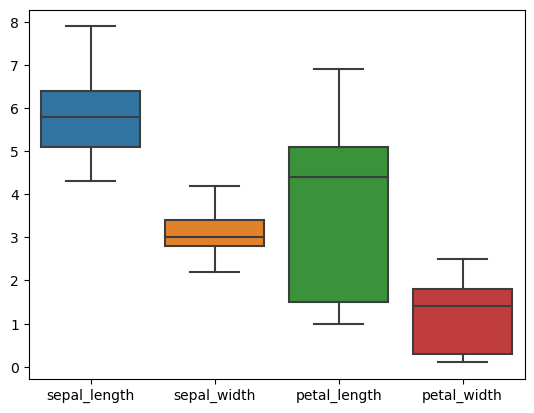

In [133]:
sns.boxplot(data=t_iris[list(t_iris.select_dtypes(float).columns)], orient="v")

In [140]:
t_iris['species'].value_counts()

versicolor    35
setosa        35
virginica     35
Name: species, dtype: int64

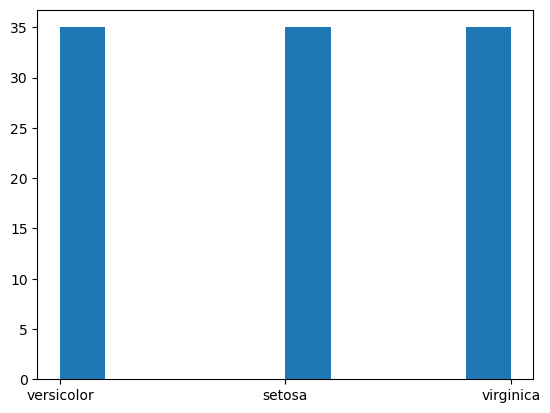

In [147]:
plt.hist(t_iris['species'])
plt.show()

In [ ]:
# I did not have even a single valuable takeaway from doing this.

3. Bivariate Stats

* Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

* For each measurement type, compute the descriptive statistics for each species.

* For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

* Document takeaways & any actions.

In [216]:
def create_subplot(df, x_axis, y_axis, h=0, w=0, size=(10,10)): #subplot where x stays the same
    plt.figure(figsize=size)
    i=1
    for col in y_axis:
        plt.subplot(h,w,i)
        sns.barplot(data=df, x=x_axis, y=col)
        i += 1
    plt.show()

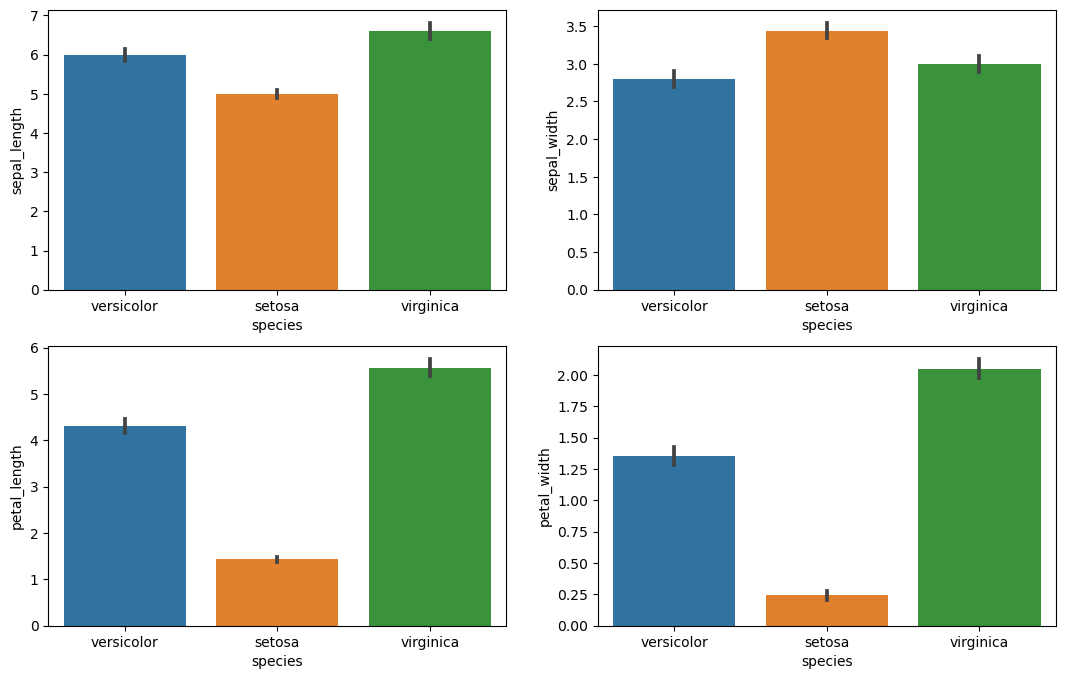

In [215]:
create_subplot(t_iris,'species',list(t_iris.select_dtypes(float).columns),h=2,w=2,size=(13,8))

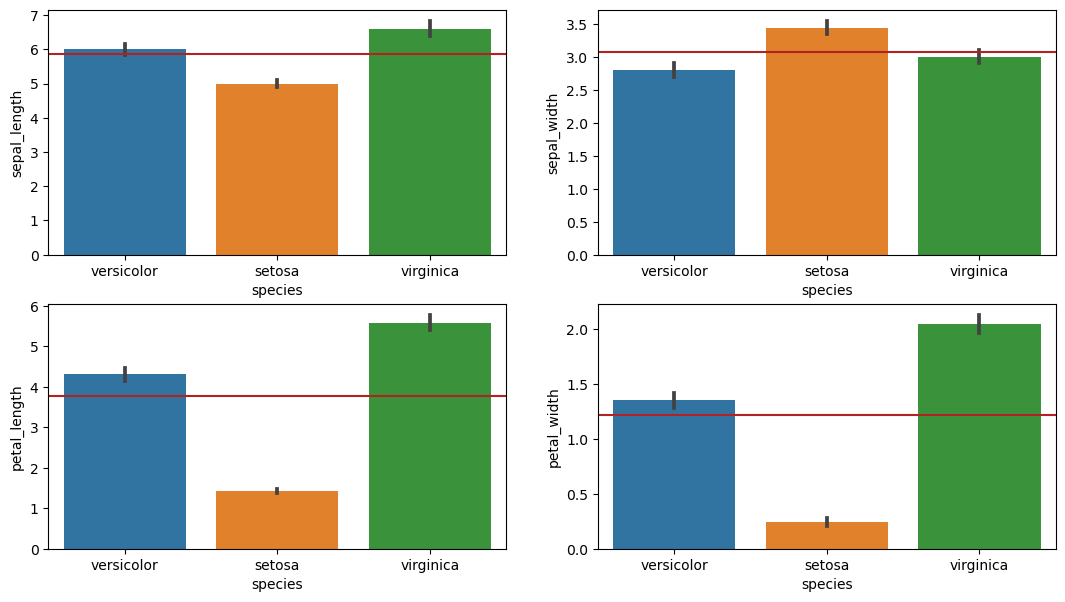

In [158]:
plt.figure(figsize = (13, 7))

plt.subplot(2,2,1)
sns.barplot(data=t_iris,x='species',y='sepal_length')
plt.axhline(t_iris.sepal_length.mean(),color='firebrick')

plt.subplot(2,2,2)
sns.barplot(data=t_iris,x='species',y='sepal_width')
plt.axhline(t_iris.sepal_width.mean(),color='firebrick')

plt.subplot(2,2,3)
sns.barplot(data=t_iris,x='species',y='petal_length')
plt.axhline(t_iris.petal_length.mean(),color='firebrick')

plt.subplot(2,2,4)
sns.barplot(data=t_iris,x='species',y='petal_width')
plt.axhline(t_iris.petal_width.mean(),color='firebrick')

In [163]:
vir = t_iris[t_iris['species']=='virginica']
ver = t_iris[t_iris['species']=='versicolor']

In [171]:
U1, p = stats.mannwhitneyu(vir.petal_width,ver.petal_width)
U1, p

(1216.0, 1.1784584637260545e-12)

In [174]:
for i in ['sepal_length','sepal_width','petal_length']:
    U1, p = stats.mannwhitneyu(vir[i],ver[i])
    print(U1, p)

953.5 6.1197740111564e-05
813.5 0.01779193121510186
1198.5 5.776687440837518e-12


In [ ]:
# Plants have different lengths and widths

4. Multivariate Stats

* Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

* Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

* Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

* Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

* Document takeaways and any actions.

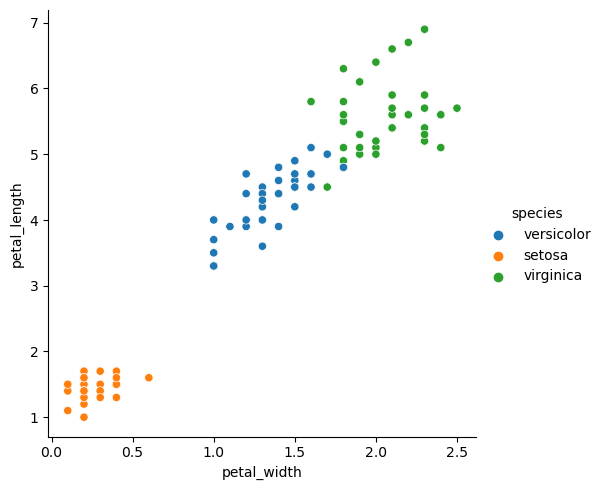

In [176]:
sns.relplot(data=t_iris, x='petal_width', y='petal_length', hue='species')

In [ ]:
# Does sepal length have any correlation with petal length?

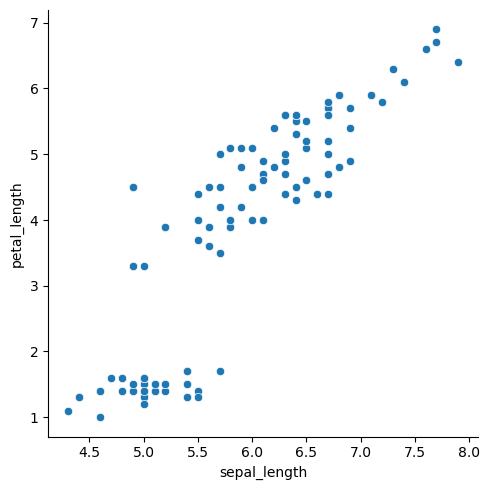

In [179]:
sepal = t_iris['sepal_length'] 
petal = t_iris['petal_length']
sns.relplot(x=sepal, y=petal)

There seems to be a very clear positive correlation between the two

In [187]:
sepal.var()

0.6890347985347993

In [185]:
t, p = stats.ttest_ind(sepal, petal)
t, p

(10.886400641331463, 3.906007485727366e-22)

## Part II

Explore your titanic dataset more completely.

* Determine drivers of the target variable
* Determine if certain columns should be dropped
* Determine if it would be valuable to bin some numeric columns
* Determine if it would be valuable to combine multiple columns into one.

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [191]:
t = ac.get_titanic_data()
t.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [ ]:
# Target variable is survival

In [ ]:
# passenger id, pclass, deck and embarked should be dropped

In [ ]:
# Categorical numeric columns like survived could be binned into 'lived' and 'died'

In [ ]:
# I dont see any value in combining columns in this table

In [ ]:
# I dont see any features worth combining

In [ ]:
# No surprises

In [ ]:
# No findings. Some columns are useless

## Part III

* Explore your telco data to discover drivers of churn
* Determine if certain columns should be dropped
* Determine if it would be valuable to bin some numeric columns
* Determine if it would be valuable to combine multiple columns into one.

What are your drivers of churn?

Does it make sense to combine any features?

Do you find any surprises?

Document any and all findings and takeaways in your notebook using markdown.

In [195]:
telco = ac.get_telco_data()
telco.head(3)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check


In [ ]:
# Could be valuable to bin customers into spending amount to turn it into categorical data.

In [ ]:
# Customer id is irrelevant. could be dropped

In [ ]:
# columns with id could be dropped since they have other columns with more information like the actual id type name

In [ ]:
# We could combine some columns to create a column with total add ons

In [ ]:
# No surprises

In [ ]:
# No valuable information from doing any of this